In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [57]:
data = '../data/crime-trends-and-operations-of-criminal-justice-systems-un-cts-csv-1.csv'

In [58]:
df = pd.read_csv(data)

In [59]:
df_brazil = df[df['country/territory'] == 'Brazil']

In [120]:
df_brazil = df_brazil.dropna()
display(df_brazil.head(20))

,country/territory,date,sexual violence,rate
147,Brazil,2006,27203.0,14.472898
148,Brazil,2007,29334.0,15.455373
149,Brazil,2008,32270.0,16.847371
150,Brazil,2009,38414.0,19.878227
151,Brazil,2010,46526.0,23.866039
152,Brazil,2011,45288.0,23.029161
153,Brazil,2012,50224.0,23.029161
154,Brazil,2013,51090.0,23.029161
155,Brazil,2014,50438.0,23.029161
156,Brazil,2015,47461.0,23.029161


In [80]:
x = df_brazil[['date']]
y = df_brazil['sexual violence']

In [81]:
#treinamento
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [164]:
anos = np.arange(2006, 2025).reshape(-1, 1)
previsoes = modelo.predict(anos)

C:\Users\muril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


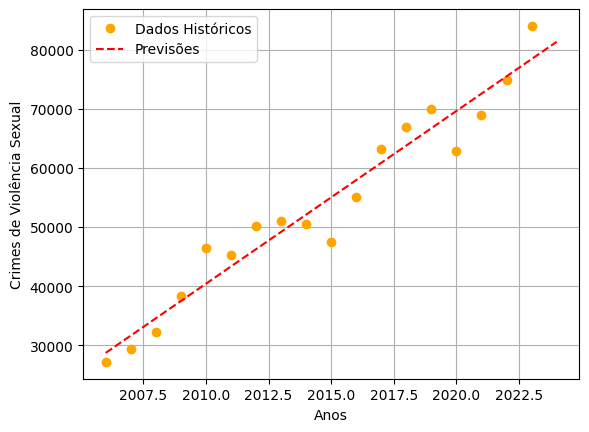

In [178]:
plt.plot(df_brazil['date'], df_brazil['sexual violence'], 'o', color='orange', label='Dados Históricos')
plt.plot(anos, previsoes, '--', color='red', label='Previsões')

plt.xlabel('Anos')
plt.ylabel('Crimes de Violência Sexual')
plt.legend()

plt.grid(True)
plt.show()

In [170]:
proximos_anos = np.arange(2025, 2031).reshape(-1, 1)
previsao_anos_futuros = modelo.predict(proximos_anos)

C:\Users\muril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


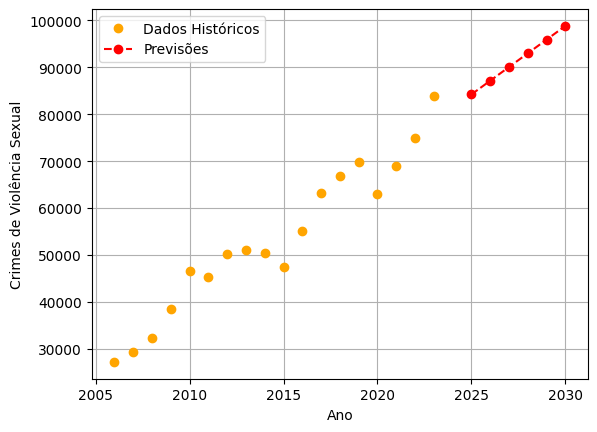

In [171]:
plt.plot(df_brazil['date'], df_brazil['sexual violence'], 'o', color='orange', label='Dados Históricos')
plt.plot(proximos_anos, previsao_anos_futuros, marker='o', color='red', linestyle='--', label='Previsões')


plt.xlabel('Ano')
plt.ylabel('Crimes de Violência Sexual')
plt.legend()
plt.grid(True)
plt.show()

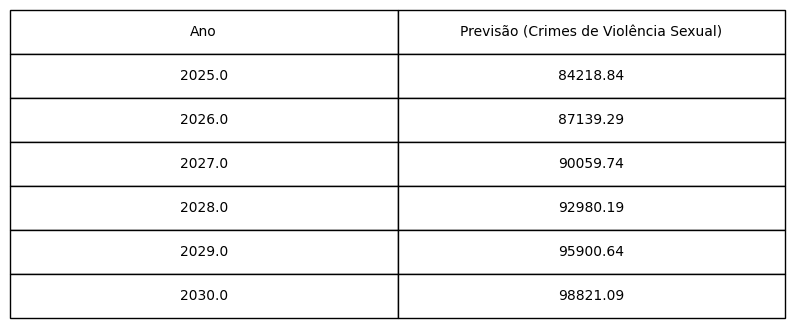

In [185]:

tabela_previsoes = pd.DataFrame({
    'Ano': proximos_anos,
    'Previsão (Crimes de Violência Sexual)': np.round(previsao_anos_futuros, 2)
})

fig, ax = plt.subplots(figsize=(10, 4))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tabela = ax.table(cellText=tabela_previsoes.values,
                  colLabels=tabela_previsoes.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])

tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1.2, 1.2)

plt.show()